## Задание
Для изображения "starry_night.jpg":
1. Считать изображение
2. Перевести в серошкальный формат
3. Провести адаптивную эквализацию гистограммы
4. Добавить на изображение эллипсы произвольного цвета (использовать random)
5. Добавить на изображение лого OpenCV
6. Сохранить результат в формате PNG

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('cv_software_tools/starry_night.jpg')

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equilized_image = clahe.apply(gray_image)

In [5]:
rgb_image = cv2.cvtColor(equilized_image, cv2.COLOR_GRAY2RGB)

In [6]:
h, w = image.shape[:2]

for _ in range(5):
    center = (np.random.randint(0, w-1), np.random.randint(0, h-1))
    axes = (np.random.randint(20, 80), np.random.randint(10, 40))
    angle = np.random.randint(0, 180)
    color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    thickness = np.random.randint(1, 3)

    cv2.ellipse(rgb_image, center, axes, angle, 0, 360, color, thickness)

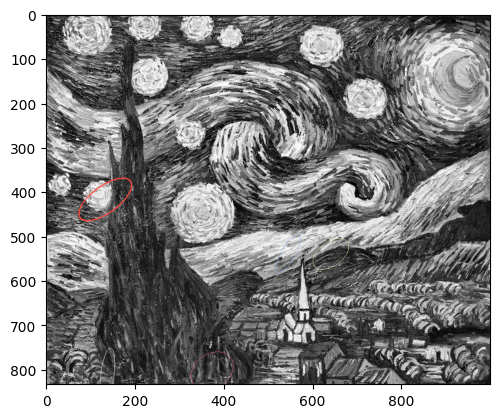

In [7]:
plt.imshow(rgb_image, cmap='gray')

In [8]:
logo = cv2.imread("cv_software_tools/opencv.png",)

In [9]:
scale = 0.2
new_w = int(w * scale)
new_h = int(logo.shape[0] * (new_w / logo.shape[1]))

logo = cv2.resize(logo, (new_w, new_h))

x0, y0 = 20, 20
x1, y1 = x0 + new_w, y0 + new_h

rgb_image[y0:y1, x0:x1] = logo

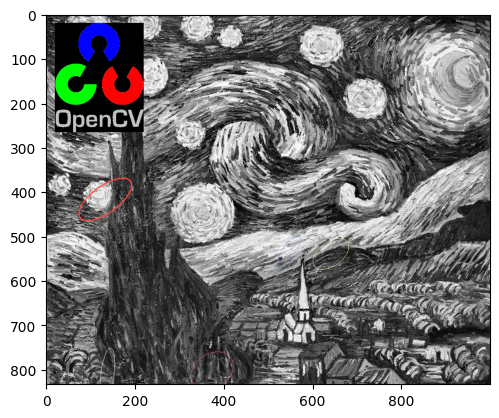

In [10]:
plt.imshow(rgb_image, cmap='gray')